In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [61]:
data = pd.read_csv('vibration2.txt', sep = ';', index_col = 0)
data['seconds'] = data.index/30
data = data[['seconds','x','y','z']]
max_g = 1 #int(input('Maximum acceptable milli-g value:'))/1000
data

,seconds,x,y,z
index,,,,
0,0.000000,0.042221,-0.081726,-1.008011
1,0.033333,0.046036,-0.080902,-1.021194
2,0.066667,0.045990,-0.094910,-1.010239
3,0.100000,0.028015,-0.091843,-0.975128
4,0.133333,0.018265,-0.086990,-0.967316
...,...,...,...,...
709,23.633333,0.040161,0.012238,-0.997421
710,23.666667,0.036758,0.018127,-1.008209
711,23.700000,0.015823,0.033356,-1.044525


In [62]:

data['xmin'] = data.seconds[(data.x.shift(1) > data.x) & (data.x.shift(-1) > data.x) & (data.x < -1* max_g)]
data['xmax'] = data.seconds[(data.x.shift(1) < data.x) & (data.x.shift(-1) < data.x) & (data.x > max_g)]
data['ymin'] = data.seconds[(data.y.shift(1) > data.y) & (data.y.shift(-1) > data.y) & (data.y < -1* max_g)]
data['ymax'] = data.seconds[(data.y.shift(1) < data.y) & (data.y.shift(-1) < data.y) & (data.y > max_g)]
data['zmin'] = data.seconds[(data.z.shift(1) > data.z) & (data.z.shift(-1) > data.z) & (data.z < -1* max_g)]
data['zmax'] = data.seconds[(data.z.shift(1) < data.z) & (data.z.shift(-1) < data.z) & (data.z > max_g)]
data

,seconds,x,y,z,xmin,xmax,ymin,ymax,zmin,zmax
index,,,,,,,,,,
0,0.000000,0.042221,-0.081726,-1.008011,NaN,NaN,NaN,NaN,NaN,NaN
1,0.033333,0.046036,-0.080902,-1.021194,NaN,NaN,NaN,NaN,0.033333,NaN
2,0.066667,0.045990,-0.094910,-1.010239,NaN,NaN,NaN,NaN,NaN,NaN
3,0.100000,0.028015,-0.091843,-0.975128,NaN,NaN,NaN,NaN,NaN,NaN
4,0.133333,0.018265,-0.086990,-0.967316,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
709,23.633333,0.040161,0.012238,-0.997421,NaN,NaN,NaN,NaN,NaN,NaN
710,23.666667,0.036758,0.018127,-1.008209,NaN,NaN,NaN,NaN,NaN,NaN
711,23.700000,0.015823,0.033356,-1.044525,NaN,NaN,NaN,NaN,23.700000,NaN


In [96]:
out = data[['xmin','xmax','ymin','ymax']]
out[out.xmin.notna() | out.xmax.notna() |out.ymin.notna()|out.ymax.notna()]

,xmin,xmax,ymin,ymax
index,,,,
258,NaN,NaN,8.600000,NaN
264,NaN,NaN,NaN,8.800000
268,NaN,NaN,8.933333,NaN
272,NaN,NaN,NaN,9.066667
279,NaN,NaN,NaN,9.300000
316,NaN,NaN,NaN,10.533333
319,NaN,NaN,10.633333,NaN
322,NaN,NaN,NaN,10.733333
325,NaN,NaN,10.833333,NaN


In [69]:
np.array(data.xmax[data.xmax.notna()])

array([16.5       , 16.73333333, 17.        , 20.        , 20.23333333,
       20.46666667, 20.7       , 22.06666667, 22.3       ])

In [70]:
np.array(data.xmin[data.xmin.notna()])

array([20.13333333, 20.36666667, 20.6       , 21.56666667, 22.2       ])

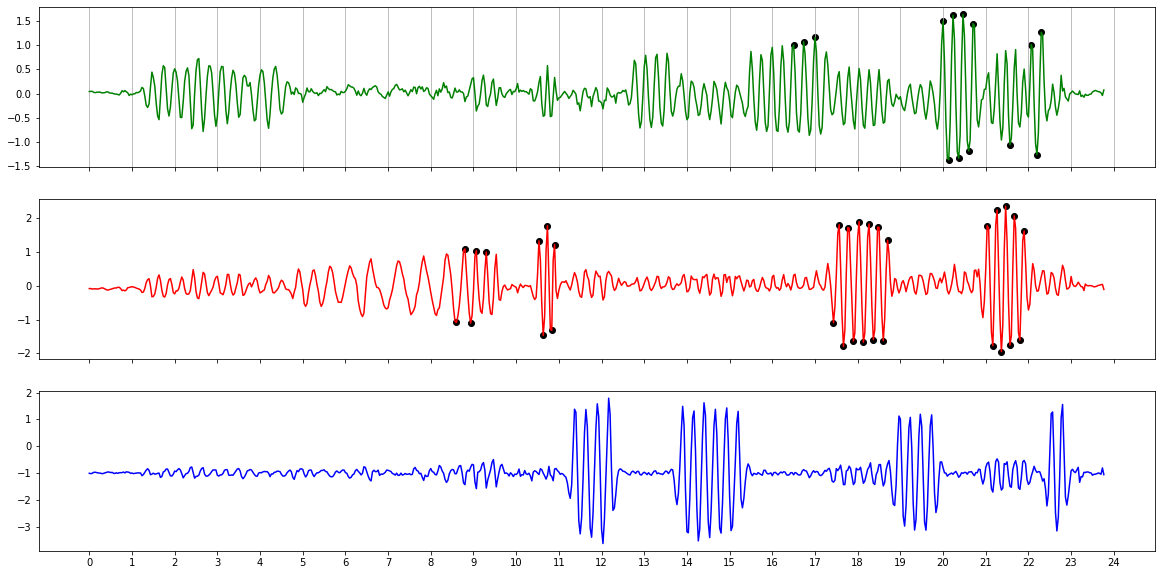

In [73]:
fig, ax = plt.subplots(3,1, figsize = (20,10), sharex = True)
# intervals = np.linspace(0, data.seconds.max(), int(data.seconds.max()))
intervals2 = np.arange(0, int(data.seconds.max())+2, 1)
plt.xticks(intervals2)
ax[0].plot(data.seconds, data.x, color = 'green')
ax[0].grid(axis = 'x', which = 'both')
ax[0].scatter(data.xmax, data.x, color = 'black', marker = 'o', s= None)
ax[0].scatter(data.xmin, data.x, color = 'black', marker = 'o', s= None)
ax[1].plot(data.seconds, data.y, color = 'red')
ax[1].scatter(data.ymax, data.y, color = 'black', marker = 'o', s= None)
ax[1].scatter(data.ymin, data.y, color = 'black', marker = 'o', s= None)
ax[2].plot(data.seconds, data.z, color = 'blue')



In [32]:
class Test():
    
    def __init__(self, numero):
        self.value = numero
        
    def the_func(self):
        self.value = self.value*2
        
    def printout(self):
        print('hello' * self.value)
    
    
    def caller(self):
        self.the_func()
        self.printout()
        


In [33]:
number1 = Test(4)

In [34]:
number1.caller()

hellohellohellohellohellohellohellohello


In [35]:
number1.value

8

In [39]:
number1.name = 'number1'
print(number1.name)

number1


In [49]:
dir(Test)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'caller',
 'printout',
 'the_func']

In [2]:
def return5(x):
    print(5*x)

a = 'test_string1'
    
lambda1 = lambda: return5(a)

In [4]:
lambda1()

test_string1test_string1test_string1test_string1test_string1


In [11]:
some_lambda = lambda x: print(x*5)

In [12]:
some_lambda('some_test_string')

some_test_stringsome_test_stringsome_test_stringsome_test_stringsome_test_string


In [5]:
test_lambda = lambda x,y,z: x+y+z

In [6]:
test_lambda(1,2,3)

6

In [9]:
class Calibration():

    def __init__(self):
        self.filepath = ''
        self.data = pd.DataFrame()
        self.baseline_x = 0
        self.baseline_y = 0
        self.baseline_z = 0
        pass

    def set_baseline(self):
        self.filepath =  'calibration.txt'#Why do i have to include tk. in this. I already imported filedialog up top
        self.data = pd.read_csv(self.filepath, sep = ';', index_col = 0)
        self.data['seconds'] = self.data.index/30
        self.data = self.data[['seconds','x','y','z']]
        self.baseline_x = self.data.x.mean()
        self.baseline_y = self.data.y.mean()
        self.baseline_z = self.data.z.mean()
        print('CURRENT FILEPATH: ' , self.filepath)
        print('X Baseline: ', self.baseline_x)
        print('Y Baseline: ', self.baseline_y)
        print('Z Baseline: ', self.baseline_z)
        

In [10]:
cal1 = Calibration()

In [11]:
cal1.set_baseline()

CURRENT FILEPATH:  calibration.txt
X Baseline:  0.014876718390804605
Y Baseline:  0.015929258620689637
Z Baseline:  -0.9957107126436777


In [7]:
cal1.data

,seconds,x,y,z
index,,,,
0,0.000000,0.013504,0.017563,-0.997086
1,0.033333,0.013855,0.016312,-0.995850
2,0.066667,0.016663,0.013916,-0.995209
3,0.100000,0.015366,0.015579,-0.996246
4,0.133333,0.013580,0.017181,-0.996063
...,...,...,...,...
343,11.433333,0.015060,0.016312,-0.996063
344,11.466667,0.015274,0.015747,-0.995193
345,11.500000,0.014359,0.015839,-0.995163


In [12]:
data = pd.read_csv('vibration2.txt', sep = ';', index_col = 0)

index
0      0.002221
1      0.006036
2      0.005990
3     -0.011985
4     -0.021735
         ...   
709    0.000161
710   -0.003242
711   -0.024177
712   -0.079368
713    0.033486
Name: x, Length: 714, dtype: float64

In [12]:
test_string1 = 'this is a '
string2 = test_string1 + 'test string'
print(string2)

this is a test string


ValueError: arrays must all be same length